# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Samples


## Chormosome Label Convert by using Dictionary

In [2]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

## File Import

In [3]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\'
pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\'
#pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\'

theWhole = {}


f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
  
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  

theWhole['chr_09'] = f_09

theWhole['chr_9_inversion'] = f_9_inversion

In [4]:
theWhole['chr_9_inversion']

['I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-1.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-10.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-11.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-12.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-2_.jpg.9invs.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-3.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-4.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-5.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\\W27694-6.jpg.9inv.bmp',
 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\chr_9_inversion\

## Image Input

In [5]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

0.09672927856445312


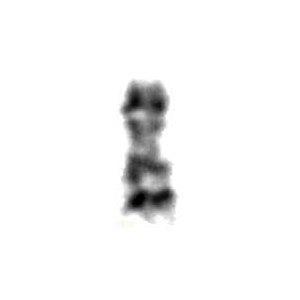

In [6]:
image['chr_9_inversion'][1]

## Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

## Data Extraction from Images

In [9]:
start = time.time()

data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)
        
end = time.time()
print(end - start)

19.54973340034485


In [10]:
imageMatrix = np.array(data['chr_9_inversion'][1])

In [11]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

In [12]:
len(x_train_list[1])

300

In [13]:
len(y_train_list)

109

### Validation Dataset

In [14]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\test\\'
pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\test\\'
#pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\test\\'

theWhole = {}

f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
  
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  

theWhole['chr_09'] = f_09

theWhole['chr_9_inversion'] = f_9_inversion

In [15]:
image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)    

### Data Extraction

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

## ChromConvert

In [18]:
y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

## Numpy Array

In [19]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [20]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [21]:
y_test

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26])

In [22]:
len(X_train)

109

In [23]:
len(y_train)

109

In [24]:
X_train[0].shape

(300, 300)

## Save the Datasets

In [25]:
np.save('X_train_2D_KaryoLearning_Abnormal', X_train)
np.save('y_train_2D_KaryoLearning_Abnormal', y_train)

In [26]:
np.save('X_test_2D_KaryoLearning_Abnormal', X_test)
np.save('y_test_2D_KaryoLearning_Abnormal', y_test)

## Load the Datasets

In [27]:
X_train = np.load('X_train_2D_KaryoLearning_Abnormal.npy')
y_train = np.load('y_train_2D_KaryoLearning_Abnormal.npy')

X_test = np.load('X_test_2D_KaryoLearning_Abnormal.npy')
y_test = np.load('y_test_2D_KaryoLearning_Abnormal.npy')

## Convolutional Neural Network

## Data Preparation

In [28]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### Training

#### Model

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [31]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(32, activation='softmax'))

#### Tensorboard Initilization

In [32]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the modal

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training

In [34]:
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/200
2/2 [==============================] - 7s 3s/step - loss: 216.5765 - accuracy: 0.0000e+00 - val_loss: 565.1299 - val_accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 6s 3s/step - loss: 424.8974 - accuracy: 0.3394 - val_loss: 178.8170 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 5s 2s/step - loss: 40.6040 - accuracy: 0.3761 - val_loss: 21.4148 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 5s 2s/step - loss: 24.3198 - accuracy: 0.4312 - val_loss: 12.2032 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 5s 2s/step - loss: 20.2337 - accuracy: 0.6055 - val_loss: 3.1279 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 5s 2s/step - loss: 4.3835 - accuracy: 0.4312 - val_loss: 1.7330 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 5s 2s/step - loss: 2.3640 - accuracy: 0.5688 - val_loss: 31.1635 - val_accuracy: 0.5000
Epoch 8/

KeyboardInterrupt: 

In [ ]:
model.summary()

### Tensorboard Display

In [ ]:
%tensorboard --logdir logs/fit

## Performance Measures

In [ ]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

In [ ]:
len(X_test)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict

In [ ]:
y_predict[0]

In [ ]:
# The number 34 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []
y_predict_filtered_prob = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)
    y_predict_filtered_prob.append(maximum)

In [ ]:
y_predict_filtered_prob

In [ ]:
len(y_predict_filtered)

In [ ]:
len(y_test)

### Confusion Matrix (混淆矩阵)

In [ ]:
label = ['chr_09', 'chr_9_inversion']

In [ ]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[9, 26]))
confusion = pd.DataFrame(cm, index=label,
                        columns=label)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

In [ ]:
print(classification_report(y_test, y_predict_filtered))

In [ ]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 40})

## Save the Model

In [ ]:
model.save('saved_model/model_cnn')

## Load the Model

In [ ]:
model_reload = keras.models.load_model('saved_model/model_cnn')

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict[:, 9]

## ROC

In [ ]:
y_predict_selected = y_predict[:, [9,26]]

In [ ]:
y_predict_selected

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_predict)

In [ ]:
y_predict_selected

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_predict_selected)

In [ ]:
metrics.plot_roc_curve(model, X_test, y_test)

In [ ]:
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)